In [4]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt

if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
    
print('Using PyTorch version:', torch.__version__, ' Device:', device)

Using PyTorch version: 1.11.0+cpu  Device: cpu


In [5]:
import os
path_to_folder = '.\data' # путь к папке с данными
name_folders = [x[0].split('\\')[-1] for x in os.walk(path_to_folder)]


In [6]:
name_folders = name_folders[1:]

In [7]:
name_folders

['(',
 ')',
 '+',
 ',',
 '-',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '1',
 '9',
 'h',
 't',
 'times',
 'w',
 'X',
 'y']

In [8]:
len(name_folders)

22

In [9]:
NUM_CLASSES = len(name_folders)
MAX_FILES = 2

In [10]:
class_idx = [i for i in range(len(name_folders))]

In [11]:
dict_folders = {name_folders[i]:class_idx[i] for i in range(len(class_idx))}

In [12]:
dict_folders

{'(': 0,
 ')': 1,
 '+': 2,
 ',': 3,
 '-': 4,
 '0': 5,
 '1': 14,
 '2': 7,
 '3': 8,
 '4': 9,
 '5': 10,
 '6': 11,
 '7': 12,
 '8': 13,
 '9': 15,
 'h': 16,
 't': 17,
 'times': 18,
 'w': 19,
 'X': 20,
 'y': 21}

In [13]:
file_names = []
class_labels = []
for path, subdirs, files in os.walk(path_to_folder):
    for name in files:
        file_names.append(os.path.join(path, name))
        class_labels.append(dict_folders[path.split('\\')[-1]])

In [14]:
import pandas as pd
import skimage
from skimage import io,morphology
from PIL import Image, ImageOps
from torchvision.io import read_image, ImageReadMode
from torch.utils.data import Dataset
from torchvision import transforms
from random import shuffle
import cv2 

class NumericDataset(Dataset):

    def __init__(self, root_dir, img_size, num_classes, transform = None):
        self.root_dir = root_dir
        self.img_size = img_size # !!! внимательно при изменении размеров изображения
        self.transform = transform
        self.num_classes = num_classes
        file_names = []
        class_labels = []
        for path, subdirs, files in os.walk(path_to_folder):
            for (idx,name) in enumerate(files):
                if(idx < MAX_FILES):
                    file_names.append(os.path.join(path, name))
                    class_labels.append(dict_folders[path.split('\\')[-1]])
        self.files = [[file_names[i],class_labels[i]] for i in range(len(file_names))]#!!!
        shuffle(self.files)

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        img_name = self.files[idx][0]

        img = cv2.imread(img_name, cv2.COLOR_RGB2GRAY)
        image = img
        image = cv2.resize(image,(self.img_size, self.img_size))
        image = cv2.bitwise_not(image) / 255
        image = np.asarray(image).astype(float)#.reshape(3,self.img_size,self.img_size)

        target = [0 for i in range(self.num_classes)]
        target[self.files[idx][1]] = 1
        target = torch.FloatTensor(target)
        
        image = torch.FloatTensor(image[:,:,0])
        if self.transform:
            image = self.transform(image)

        return image,target,self.files[idx][1]

In [15]:
from torch.utils.data import DataLoader
from torchvision import transforms
#transforms = torch.nn.Sequential(
#    transforms.Resize((28,28))
#)
batch_size = 10
IMAGE_SIZE = 32
num_train_dataloader = DataLoader(NumericDataset(path_to_folder,IMAGE_SIZE,NUM_CLASSES), batch_size=batch_size, shuffle=True)

In [16]:
for (X_train, y_train,class_idx) in num_train_dataloader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([10, 32, 32]) type: torch.FloatTensor
y_train: torch.Size([10, 22]) type: torch.FloatTensor


tensor([[0.0039, 0.0000, 0.0039,  ..., 0.0157, 0.0000, 0.0039],
        [0.0078, 0.0000, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
        [0.0000, 0.0039, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
        ...,
        [0.0000, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
        [0.0078, 0.0039, 0.0118,  ..., 0.0000, 0.0000, 0.0000],
        [0.0039, 0.0000, 0.0078,  ..., 0.0000, 0.0000, 0.0000]])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0

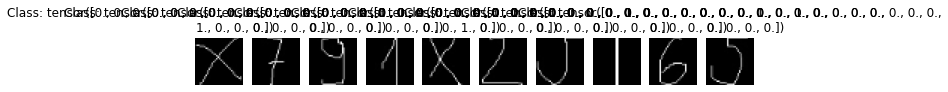

In [17]:
pltsize=1
plt.figure(figsize=(10*pltsize, pltsize))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(X_train[i].numpy(), cmap = 'gray')
    plt.title('Class: '+str(y_train[i]))
    #plt.show()
    print(X_train[i,:,:])

In [18]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(IMAGE_SIZE*IMAGE_SIZE, 4*IMAGE_SIZE*IMAGE_SIZE)
        #self.fc1_drop = nn.Dropout(0.2)
        self.fc2 = nn.Linear(4*IMAGE_SIZE*IMAGE_SIZE, 4*NUM_CLASSES)
        #self.fc2_drop = nn.Dropout(0.2)
        self.fc3 = nn.Linear(4*NUM_CLASSES, NUM_CLASSES)

    def forward(self, x):
        x = x.view(-1, IMAGE_SIZE*IMAGE_SIZE)
        #x = F.sigmoid(self.fc1(x))
        x = self.fc1(x)
        #x = self.fc1_drop(x)
        #x = F.sigmoid(self.fc2(x))
        x = self.fc2(x)
        #x = self.fc2_drop(x)
        #return F.softmax(self.fc3(x), dim=1)
        return self.fc3(x)


In [74]:
path_model_save = './models/'
epoch_loss = 0
def train(epoch, log_interval=200):
    # Set model to training mode
    model.train()
    epoch_loss = 0
    k = 0    
    # Loop over each batch from the training set
    for batch_idx, (data, target,idx_class) in enumerate(num_train_dataloader):
        # Copy data to GPU if needed
        data = data.to(device)
        target = target.to(device)

        # Zero gradient buffers
        optimizer.zero_grad() 
        
        # Pass data through the network
        output = model(data)

        # Calculate loss
        #print(output,target)
        loss = criterion(output, target)
        epoch_loss += loss.item()
        k+=1
        # Backpropagate
        loss.backward()
        
        # Update weights
        optimizer.step() 
      
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f} Epoch_Loss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(num_train_dataloader.dataset),
                100. * batch_idx / len(num_train_dataloader), loss.data.item(), epoch_loss))
    return epoch_loss / k

In [75]:
import torchvision
from torchvision import models

epoch_start = 0
epochs = 1000
path_model_save = './models/'

model = Net().to(device) #!!!

optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()

model.train()
lossv = []
for epoch in range(epoch_start, epochs + 1):
    lossv.append(train(epoch))
    if(epoch%2==0):
        torch.save(model.state_dict(), path_model_save+'mlp_model_22_classes_'+str(epoch)+'.pth')
    #validate(lossv, accv)
    #train(epoch, model_CNN)
    #validate(lossv_CNN, accv_CNN)

Train Epoch: 0 [0/44 (0%)]	Loss: 3.071973 Epoch_Loss: 3.071973
Train Epoch: 1 [0/44 (0%)]	Loss: 3.091541 Epoch_Loss: 3.091541
Train Epoch: 2 [0/44 (0%)]	Loss: 3.087038 Epoch_Loss: 3.087038
Train Epoch: 3 [0/44 (0%)]	Loss: 3.120033 Epoch_Loss: 3.120033
Train Epoch: 4 [0/44 (0%)]	Loss: 3.076956 Epoch_Loss: 3.076956
Train Epoch: 5 [0/44 (0%)]	Loss: 3.007741 Epoch_Loss: 3.007741
Train Epoch: 6 [0/44 (0%)]	Loss: 2.998217 Epoch_Loss: 2.998217
Train Epoch: 7 [0/44 (0%)]	Loss: 2.982069 Epoch_Loss: 2.982069
Train Epoch: 8 [0/44 (0%)]	Loss: 2.995047 Epoch_Loss: 2.995047
Train Epoch: 9 [0/44 (0%)]	Loss: 2.914271 Epoch_Loss: 2.914271
Train Epoch: 10 [0/44 (0%)]	Loss: 2.976403 Epoch_Loss: 2.976403
Train Epoch: 11 [0/44 (0%)]	Loss: 2.886428 Epoch_Loss: 2.886428
Train Epoch: 12 [0/44 (0%)]	Loss: 2.862307 Epoch_Loss: 2.862307
Train Epoch: 13 [0/44 (0%)]	Loss: 2.794016 Epoch_Loss: 2.794016
Train Epoch: 14 [0/44 (0%)]	Loss: 2.813764 Epoch_Loss: 2.813764
Train Epoch: 15 [0/44 (0%)]	Loss: 2.796826 Epoch_L

Train Epoch: 129 [0/44 (0%)]	Loss: 0.620239 Epoch_Loss: 0.620239
Train Epoch: 130 [0/44 (0%)]	Loss: 0.468142 Epoch_Loss: 0.468142
Train Epoch: 131 [0/44 (0%)]	Loss: 0.380110 Epoch_Loss: 0.380110
Train Epoch: 132 [0/44 (0%)]	Loss: 0.458225 Epoch_Loss: 0.458225
Train Epoch: 133 [0/44 (0%)]	Loss: 0.305101 Epoch_Loss: 0.305101
Train Epoch: 134 [0/44 (0%)]	Loss: 0.294565 Epoch_Loss: 0.294565
Train Epoch: 135 [0/44 (0%)]	Loss: 0.467822 Epoch_Loss: 0.467822
Train Epoch: 136 [0/44 (0%)]	Loss: 0.304395 Epoch_Loss: 0.304395
Train Epoch: 137 [0/44 (0%)]	Loss: 0.304087 Epoch_Loss: 0.304087
Train Epoch: 138 [0/44 (0%)]	Loss: 0.386317 Epoch_Loss: 0.386317
Train Epoch: 139 [0/44 (0%)]	Loss: 0.205938 Epoch_Loss: 0.205938
Train Epoch: 140 [0/44 (0%)]	Loss: 0.306891 Epoch_Loss: 0.306891
Train Epoch: 141 [0/44 (0%)]	Loss: 0.326686 Epoch_Loss: 0.326686
Train Epoch: 142 [0/44 (0%)]	Loss: 0.231755 Epoch_Loss: 0.231755
Train Epoch: 143 [0/44 (0%)]	Loss: 0.332625 Epoch_Loss: 0.332625
Train Epoch: 144 [0/44 (0

Train Epoch: 257 [0/44 (0%)]	Loss: 0.107775 Epoch_Loss: 0.107775
Train Epoch: 258 [0/44 (0%)]	Loss: 0.044136 Epoch_Loss: 0.044136
Train Epoch: 259 [0/44 (0%)]	Loss: 0.076473 Epoch_Loss: 0.076473
Train Epoch: 260 [0/44 (0%)]	Loss: 0.141427 Epoch_Loss: 0.141427
Train Epoch: 261 [0/44 (0%)]	Loss: 0.059974 Epoch_Loss: 0.059974
Train Epoch: 262 [0/44 (0%)]	Loss: 0.144840 Epoch_Loss: 0.144840
Train Epoch: 263 [0/44 (0%)]	Loss: 0.128529 Epoch_Loss: 0.128529
Train Epoch: 264 [0/44 (0%)]	Loss: 0.142674 Epoch_Loss: 0.142674
Train Epoch: 265 [0/44 (0%)]	Loss: 0.060962 Epoch_Loss: 0.060962
Train Epoch: 266 [0/44 (0%)]	Loss: 0.047457 Epoch_Loss: 0.047457
Train Epoch: 267 [0/44 (0%)]	Loss: 0.061045 Epoch_Loss: 0.061045
Train Epoch: 268 [0/44 (0%)]	Loss: 0.064011 Epoch_Loss: 0.064011
Train Epoch: 269 [0/44 (0%)]	Loss: 0.089967 Epoch_Loss: 0.089967
Train Epoch: 270 [0/44 (0%)]	Loss: 0.031418 Epoch_Loss: 0.031418
Train Epoch: 271 [0/44 (0%)]	Loss: 0.054015 Epoch_Loss: 0.054015
Train Epoch: 272 [0/44 (0

Train Epoch: 385 [0/44 (0%)]	Loss: 0.028820 Epoch_Loss: 0.028820
Train Epoch: 386 [0/44 (0%)]	Loss: 0.038757 Epoch_Loss: 0.038757
Train Epoch: 387 [0/44 (0%)]	Loss: 0.078081 Epoch_Loss: 0.078081
Train Epoch: 388 [0/44 (0%)]	Loss: 0.046107 Epoch_Loss: 0.046107
Train Epoch: 389 [0/44 (0%)]	Loss: 0.062027 Epoch_Loss: 0.062027
Train Epoch: 390 [0/44 (0%)]	Loss: 0.020737 Epoch_Loss: 0.020737
Train Epoch: 391 [0/44 (0%)]	Loss: 0.035953 Epoch_Loss: 0.035953
Train Epoch: 392 [0/44 (0%)]	Loss: 0.053217 Epoch_Loss: 0.053217
Train Epoch: 393 [0/44 (0%)]	Loss: 0.028680 Epoch_Loss: 0.028680
Train Epoch: 394 [0/44 (0%)]	Loss: 0.041558 Epoch_Loss: 0.041558
Train Epoch: 395 [0/44 (0%)]	Loss: 0.026828 Epoch_Loss: 0.026828
Train Epoch: 396 [0/44 (0%)]	Loss: 0.036633 Epoch_Loss: 0.036633
Train Epoch: 397 [0/44 (0%)]	Loss: 0.067666 Epoch_Loss: 0.067666
Train Epoch: 398 [0/44 (0%)]	Loss: 0.029063 Epoch_Loss: 0.029063
Train Epoch: 399 [0/44 (0%)]	Loss: 0.018802 Epoch_Loss: 0.018802
Train Epoch: 400 [0/44 (0

Train Epoch: 513 [0/44 (0%)]	Loss: 0.024283 Epoch_Loss: 0.024283
Train Epoch: 514 [0/44 (0%)]	Loss: 0.010859 Epoch_Loss: 0.010859
Train Epoch: 515 [0/44 (0%)]	Loss: 0.022175 Epoch_Loss: 0.022175
Train Epoch: 516 [0/44 (0%)]	Loss: 0.047662 Epoch_Loss: 0.047662
Train Epoch: 517 [0/44 (0%)]	Loss: 0.011733 Epoch_Loss: 0.011733
Train Epoch: 518 [0/44 (0%)]	Loss: 0.021516 Epoch_Loss: 0.021516
Train Epoch: 519 [0/44 (0%)]	Loss: 0.020743 Epoch_Loss: 0.020743
Train Epoch: 520 [0/44 (0%)]	Loss: 0.016724 Epoch_Loss: 0.016724
Train Epoch: 521 [0/44 (0%)]	Loss: 0.020779 Epoch_Loss: 0.020779
Train Epoch: 522 [0/44 (0%)]	Loss: 0.015496 Epoch_Loss: 0.015496
Train Epoch: 523 [0/44 (0%)]	Loss: 0.038085 Epoch_Loss: 0.038085
Train Epoch: 524 [0/44 (0%)]	Loss: 0.043535 Epoch_Loss: 0.043535
Train Epoch: 525 [0/44 (0%)]	Loss: 0.013872 Epoch_Loss: 0.013872
Train Epoch: 526 [0/44 (0%)]	Loss: 0.040372 Epoch_Loss: 0.040372
Train Epoch: 527 [0/44 (0%)]	Loss: 0.040552 Epoch_Loss: 0.040552
Train Epoch: 528 [0/44 (0

Train Epoch: 641 [0/44 (0%)]	Loss: 0.014175 Epoch_Loss: 0.014175
Train Epoch: 642 [0/44 (0%)]	Loss: 0.013886 Epoch_Loss: 0.013886
Train Epoch: 643 [0/44 (0%)]	Loss: 0.012816 Epoch_Loss: 0.012816
Train Epoch: 644 [0/44 (0%)]	Loss: 0.017300 Epoch_Loss: 0.017300
Train Epoch: 645 [0/44 (0%)]	Loss: 0.026584 Epoch_Loss: 0.026584
Train Epoch: 646 [0/44 (0%)]	Loss: 0.023881 Epoch_Loss: 0.023881
Train Epoch: 647 [0/44 (0%)]	Loss: 0.029063 Epoch_Loss: 0.029063
Train Epoch: 648 [0/44 (0%)]	Loss: 0.009407 Epoch_Loss: 0.009407
Train Epoch: 649 [0/44 (0%)]	Loss: 0.010220 Epoch_Loss: 0.010220
Train Epoch: 650 [0/44 (0%)]	Loss: 0.010361 Epoch_Loss: 0.010361
Train Epoch: 651 [0/44 (0%)]	Loss: 0.012927 Epoch_Loss: 0.012927
Train Epoch: 652 [0/44 (0%)]	Loss: 0.023830 Epoch_Loss: 0.023830
Train Epoch: 653 [0/44 (0%)]	Loss: 0.008806 Epoch_Loss: 0.008806
Train Epoch: 654 [0/44 (0%)]	Loss: 0.024887 Epoch_Loss: 0.024887
Train Epoch: 655 [0/44 (0%)]	Loss: 0.009445 Epoch_Loss: 0.009445
Train Epoch: 656 [0/44 (0

Train Epoch: 769 [0/44 (0%)]	Loss: 0.020533 Epoch_Loss: 0.020533
Train Epoch: 770 [0/44 (0%)]	Loss: 0.006167 Epoch_Loss: 0.006167
Train Epoch: 771 [0/44 (0%)]	Loss: 0.007500 Epoch_Loss: 0.007500
Train Epoch: 772 [0/44 (0%)]	Loss: 0.007430 Epoch_Loss: 0.007430
Train Epoch: 773 [0/44 (0%)]	Loss: 0.010724 Epoch_Loss: 0.010724
Train Epoch: 774 [0/44 (0%)]	Loss: 0.007970 Epoch_Loss: 0.007970
Train Epoch: 775 [0/44 (0%)]	Loss: 0.022129 Epoch_Loss: 0.022129
Train Epoch: 776 [0/44 (0%)]	Loss: 0.005325 Epoch_Loss: 0.005325
Train Epoch: 777 [0/44 (0%)]	Loss: 0.006781 Epoch_Loss: 0.006781
Train Epoch: 778 [0/44 (0%)]	Loss: 0.009300 Epoch_Loss: 0.009300
Train Epoch: 779 [0/44 (0%)]	Loss: 0.006923 Epoch_Loss: 0.006923
Train Epoch: 780 [0/44 (0%)]	Loss: 0.010551 Epoch_Loss: 0.010551
Train Epoch: 781 [0/44 (0%)]	Loss: 0.010620 Epoch_Loss: 0.010620
Train Epoch: 782 [0/44 (0%)]	Loss: 0.009612 Epoch_Loss: 0.009612
Train Epoch: 783 [0/44 (0%)]	Loss: 0.017026 Epoch_Loss: 0.017026
Train Epoch: 784 [0/44 (0

Train Epoch: 897 [0/44 (0%)]	Loss: 0.015917 Epoch_Loss: 0.015917
Train Epoch: 898 [0/44 (0%)]	Loss: 0.014656 Epoch_Loss: 0.014656
Train Epoch: 899 [0/44 (0%)]	Loss: 0.015733 Epoch_Loss: 0.015733
Train Epoch: 900 [0/44 (0%)]	Loss: 0.015183 Epoch_Loss: 0.015183
Train Epoch: 901 [0/44 (0%)]	Loss: 0.008430 Epoch_Loss: 0.008430
Train Epoch: 902 [0/44 (0%)]	Loss: 0.005059 Epoch_Loss: 0.005059
Train Epoch: 903 [0/44 (0%)]	Loss: 0.005949 Epoch_Loss: 0.005949
Train Epoch: 904 [0/44 (0%)]	Loss: 0.014481 Epoch_Loss: 0.014481
Train Epoch: 905 [0/44 (0%)]	Loss: 0.006977 Epoch_Loss: 0.006977
Train Epoch: 906 [0/44 (0%)]	Loss: 0.007864 Epoch_Loss: 0.007864
Train Epoch: 907 [0/44 (0%)]	Loss: 0.006204 Epoch_Loss: 0.006204
Train Epoch: 908 [0/44 (0%)]	Loss: 0.011209 Epoch_Loss: 0.011209
Train Epoch: 909 [0/44 (0%)]	Loss: 0.007011 Epoch_Loss: 0.007011
Train Epoch: 910 [0/44 (0%)]	Loss: 0.015139 Epoch_Loss: 0.015139
Train Epoch: 911 [0/44 (0%)]	Loss: 0.008844 Epoch_Loss: 0.008844
Train Epoch: 912 [0/44 (0

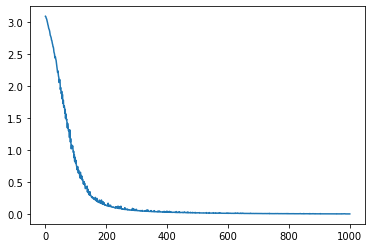

In [76]:
plt.plot(lossv)

In [19]:
my_model = Net().to(device)
my_model.load_state_dict(torch.load('./models/___.pth'))

<All keys matched successfully>

In [20]:
my_model.eval()

Net(
  (fc1): Linear(in_features=1024, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=88, bias=True)
  (fc3): Linear(in_features=88, out_features=22, bias=True)
)

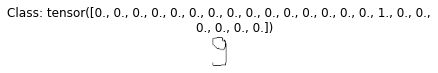

tensor(15) tensor(15)


In [23]:

for i in range(2,3):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(X_train[i].numpy().reshape(IMAGE_SIZE,IMAGE_SIZE), cmap="gray_r")
    plt.title('Class: '+str(y_train[i]))
    plt.show()
    result=  my_model(X_train[i])
    result = result
    print(torch.argmax(y_train[i]),torch.argmax(result))
    #print(len(result[0]))

In [22]:
result[0].max()

tensor(47.4179, grad_fn=<MaxBackward1>)

In [ ]:
torch.argmax(result)